# CS 240 Project
### Ahmet Öztemiz - 213010595

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

#### We need to import common packages to use in out analysis then we will upload our dataframes from dataset file.

## Section 1-)

#### Is there any crucial effect of basketball player’s race on scoring rate? How does race affects playing better in a game?

In [2]:
players = pd.read_csv('datasets/basketball_players.csv', low_memory=False)
master = pd.read_csv('datasets/basketball_master.csv', low_memory=False)
awards_player = pd.read_csv('datasets/basketball_awards_players.csv', low_memory=False)
#In this cell, we are uploading related dataframes from datasets file which takes awards, points and race.

## Section 2-)

#### In the following part shows summary of dataframes and some statistical informations about our dataframe to have an idea about raw informations. 

In [3]:
players.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
master.head()

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,bioID,bioID,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,0000-00-00,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,0000-00-00,r
1,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
2,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
3,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,G,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
4,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,G,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B


In [5]:
awards_player.head()

,playerID,award,year,lgID,note,pos
0,feeribo01,All-NBA First Team,1946,NBA,NaN,NaN
1,fulksjo01,All-NBA First Team,1946,NBA,NaN,NaN
2,mckinho01,All-NBA First Team,1946,NBA,NaN,NaN
3,miasest01,All-NBA First Team,1946,NBA,NaN,NaN
4,zasloma01,All-NBA First Team,1946,NBA,NaN,NaN


In [6]:
players_points = players.loc[:,['playerID', 'points']] #This line helps to take playerID and points and gamePlayed columns.
players_race = master.loc[1:,['bioID', 'race']] #This line helps to take bioID and race columns except first row.
players_awards = awards_player.loc[:,['playerID', 'award']] #This line helps to take playerID and award columns.

In [7]:
players_points.head()

,playerID,points
0,abramjo01,527
1,aubucch01,65
2,bakerno01,0
3,baltihe01,138
4,barrjo01,295


In [8]:
players_race.head()

,bioID,race
1,abdelal01,B
2,abdulka01,B
3,abdulma01,B
4,abdulma02,B
5,abdulta01,B


In [9]:
players_awards.head()

,playerID,award
0,feeribo01,All-NBA First Team
1,fulksjo01,All-NBA First Team
2,mckinho01,All-NBA First Team
3,miasest01,All-NBA First Team
4,zasloma01,All-NBA First Team


In [10]:
players_race.isnull().sum().reset_index()
#We need to remove row which have null values in race column.

,index,0
0,bioID,0
1,race,159


#### We need to check null and redundant values in our dataframe to remove these needless values.

In [11]:
players_points.groupby("playerID").count().reset_index()
#This line shows number of duplicated players.
#One player could have more than one row but,
#we need to have one row for each player so we
#need to sum points for each player for finding
#total points of players.

,playerID,points
0,abdelal01,7
1,abdulka01,20
2,abdulma01,11
3,abdulma02,9
4,abdulta01,8
5,abdulza01,12
6,abdursh01,13
7,abernto01,6
8,ablefo01,1
9,abramjo01,4


In [12]:
players_points = players_points.groupby("playerID").sum().reset_index()
players_points
#After this line, we have only one row for total points of each player.

,playerID,points
0,abdelal01,1465
1,abdulka01,38387
2,abdulma01,9087
3,abdulma02,8553
4,abdulta01,1830
5,abdulza01,4557
6,abdursh01,15028
7,abernto01,1779
8,ablefo01,0
9,abramjo01,719


In [13]:
total_awards = players_awards.groupby("playerID").count().reset_index()
total_awards
#Also, we can see that one player can win more than one awards so we need to count their total awards.
#After this line, we only have players and their total awards.

,playerID,award
0,abdulka01,35
1,abdulma02,1
2,adamsal01,1
3,aingeda01,1
4,aldrila01,1
5,allenra02,2
6,allento01,2
7,anderry01,1
8,anthoca01,5
9,archina01,5


In [14]:
players_race.isnull().sum().reset_index()
#This dataframe have 159 null value for race column.

,index,0
0,bioID,0
1,race,159


In [15]:
players_race.groupby('race').count().reset_index()
#Race column have 4 different values and two of them useful for our analysis.

,race,bioID
0,1,2
1,B,2460
2,O,9
3,W,2431


In [16]:
players_race = players_race.replace('1', pd.np.nan)
players_race = players_race.replace('O', pd.np.nan)
clean_players_race = players_race.dropna(how="any")
clean_players_race.columns = ('playerID', 'race')
#Race column removed redundant and nan values in this cell.

In [17]:
clean_players_race.groupby('race').count().reset_index()
#There is no null value in race column after cleaning.

,race,playerID
0,B,2460
1,W,2431


In [18]:
clean_players_race.isnull().sum().reset_index()
#There is no null value in race column after cleaning.

,index,0
0,playerID,0
1,race,0


In [19]:
df = pd.merge(players_points, clean_players_race)
df.head()

,playerID,points,race
0,abdelal01,1465,B
1,abdulka01,38387,B
2,abdulma01,9087,B
3,abdulma02,8553,B
4,abdulta01,1830,B


In [20]:
df = pd.merge(total_awards, df)
df.head()

,playerID,award,points,race
0,abdulka01,35,38387,B
1,abdulma02,1,8553,B
2,adamsal01,1,13910,W
3,aingeda01,1,11964,W
4,aldrila01,1,7738,B


## Section 3-)

In [21]:
df['points'].describe()
#This cell shows some descriptive statistics values for our points column.

count      439.000000
mean     10555.268793
std       7026.352579
min        125.000000
25%       4699.000000
50%       9924.000000
75%      14797.500000
max      38387.000000
Name: points, dtype: float64

In [22]:
df['award'].describe()
#This cell shows some descriptive statistics values for our GP column.

count    439.000000
mean       3.899772
std        5.095792
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       35.000000
Name: award, dtype: float64

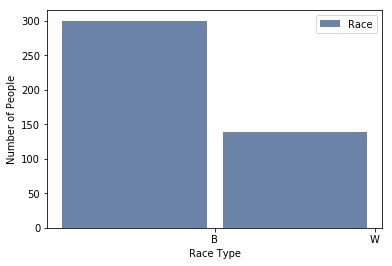

In [23]:
hist = thinkstats2.Hist(df.race, label='Race')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Race Type', ylabel='Number of People')
#In this cell, we are plotting race histogram that dvided into two sets as white and black.

In [24]:
white_df = df[(df[['race']] != 'B').all(axis=1)]
black_df = df[(df[['race']] != 'W').all(axis=1)]
#In this cell, we are dividing our dataset as white and black players.

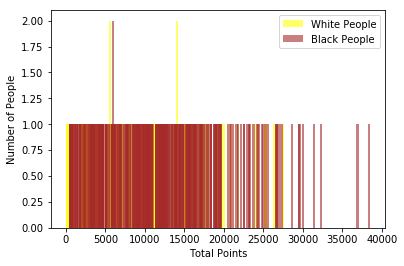

In [25]:
hist_white = thinkstats2.Hist(white_df.points, label='White People')
hist_black = thinkstats2.Hist(black_df.points, label='Black People')
thinkplot.Hist(hist_white, width=300, color= "yellow")
thinkplot.Hist(hist_black, width=300, color= "brown")
thinkplot.Config(xlabel='Total Points', ylabel='Number of People')
#This cell removing points which are smaller than 10 for white people..

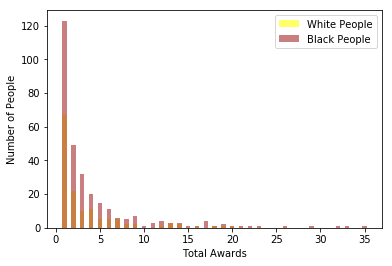

In [26]:
hist_white = thinkstats2.Hist(white_df.award, label='White People')
hist_black = thinkstats2.Hist(black_df.award, label='Black People')
thinkplot.Hist(hist_white, width=0.5, color= "yellow")
thinkplot.Hist(hist_black, width=0.5, color= "brown")
thinkplot.Config(xlabel='Total Awards', ylabel='Number of People')
#This cell removing points which are smaller than 10 for white people.

In [27]:
white_points_pmf = thinkstats2.Pmf(white_df.points, label='white')
black_points_pmf = thinkstats2.Pmf(black_df.points, label='black')
white_award_pmf = thinkstats2.Pmf(white_df.award, label='white')
black_award_pmf = thinkstats2.Pmf(black_df.award, label='black')
#In this cell, we are generating pmf model for both race.

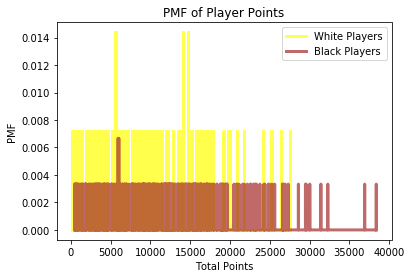

<Figure size 576x432 with 0 Axes>

In [28]:
hist_white_points = thinkstats2.Pmf(white_df.points,label="White Players")
hist_black_points = thinkstats2.Pmf(black_df.points,label="Black Players")
thinkplot.PrePlot(2)
thinkplot.Pmf(hist_white_points, color='Yellow', align='right')
thinkplot.Pmf(hist_black_points, color='Brown', align='right') 
thinkplot.Show(xlabel='Total Points', ylabel='PMF',loc='upper right',title='PMF of Player Points')

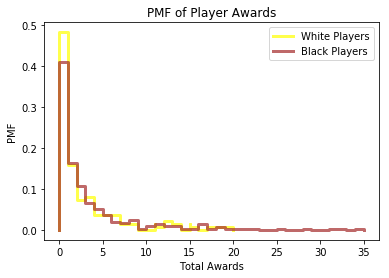

<Figure size 576x432 with 0 Axes>

In [29]:
hist_white_awards = thinkstats2.Pmf(white_df.award,label="White Players")
hist_black_awards = thinkstats2.Pmf(black_df.award,label="Black Players")
thinkplot.PrePlot(2)
thinkplot.Pmf(hist_white_awards, color='Yellow', align='right')
thinkplot.Pmf(hist_black_awards, color='Brown', align='right') 
thinkplot.Show(xlabel='Total Awards', ylabel='PMF',loc='upper right',title='PMF of Player Awards')

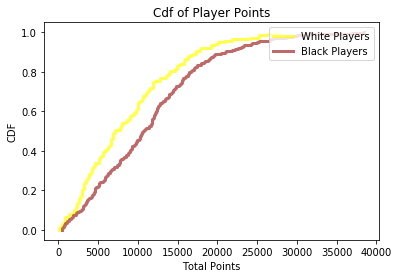

<Figure size 576x432 with 0 Axes>

In [30]:
hist_white_points2 = thinkstats2.Cdf(white_df.points)
hist_black_points2 = thinkstats2.Cdf(black_df.points)
thinkplot.Cdf(hist_white_points2, color='Yellow',label="White Players")
thinkplot.Cdf(hist_black_points2, color='Brown',label="Black Players") 
thinkplot.Show(xlabel='Total Points', ylabel='CDF',loc='upper right',title='Cdf of Player Points')

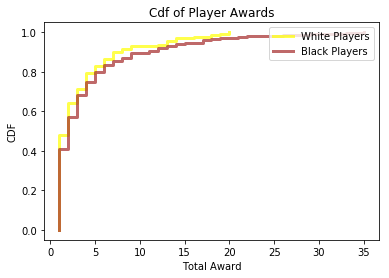

<Figure size 576x432 with 0 Axes>

In [31]:
hist_white_award2 = thinkstats2.Cdf(white_df.award)
hist_black_award2 = thinkstats2.Cdf(black_df.award)
thinkplot.Cdf(hist_white_award2, color='Yellow',label="White Players")
thinkplot.Cdf(hist_black_award2, color='Brown',label="Black Players") 
thinkplot.Show(xlabel='Total Award', ylabel='CDF',loc='upper right',title='Cdf of Player Awards')

## Section 4-)

In [32]:
from scipy.stats.stats import pearsonr
pearsonr(df.points, df.award)
#Pearson R correlations could show correlation between points and awards columns.
#Also, it gives us P-value.

(0.63474782647986439, 6.9649401616661293e-51)

#### In this section, i am using normal distribution for modelling and following codes are creating normal distribution plots.

('Mean, Var', 8704.2408759124082, 36343110.285044476)
('Sigma', 6028.5247187885425)


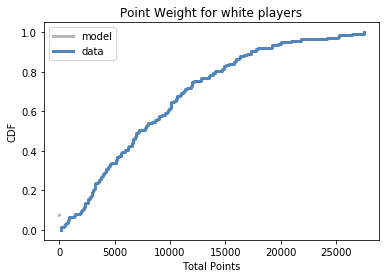

In [33]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(white_df.points, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(white_df.points, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Point Weight for white players',
                 xlabel='Total Points',
                 ylabel='CDF')

('Mean, Var', 3.2116788321167884, 13.363951196121265)
('Sigma', 3.6556738361239596)


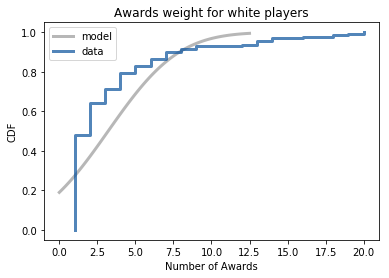

In [34]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(white_df.award, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(white_df.award, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Awards weight for white players',
                 xlabel='Number of Awards',
                 ylabel='CDF')

('Mean, Var', 11240.115646258504, 45564055.79614976)
('Sigma', 6750.1152431754645)


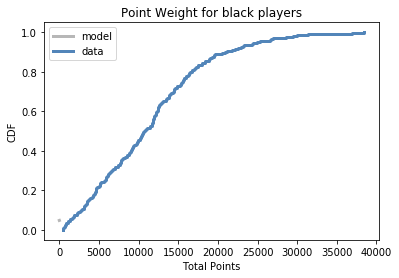

In [35]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(black_df.points, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(black_df.points, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Point Weight for black players',
                 xlabel='Total Points',
                 ylabel='CDF')

('Mean, Var', 3.9047619047619047, 22.385487528344669)
('Sigma', 4.7313304184282741)


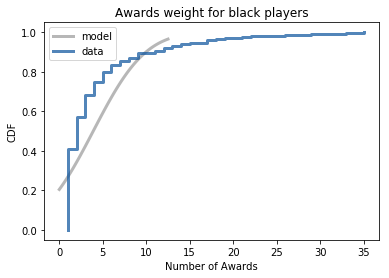

In [36]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(black_df.award, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(black_df.award, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Awards weight for black players',
                 xlabel='Number of Awards',
                 ylabel='CDF')

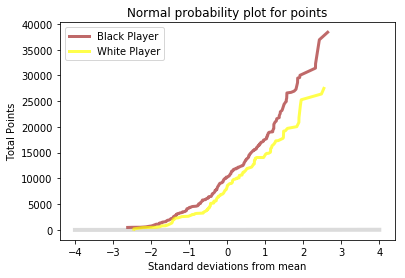

In [37]:
mean, var = thinkstats2.TrimmedMeanVar(white_df.award, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(black_df.points)
thinkplot.Plot(xs, ys, label='Black Player', color='brown')

xs, ys = thinkstats2.NormalProbability(white_df.points)
thinkplot.Plot(xs, ys, label='White Player', color='yellow')
thinkplot.Config(title='Normal probability plot for points',
                 xlabel='Standard deviations from mean',
                 ylabel='Total Points')

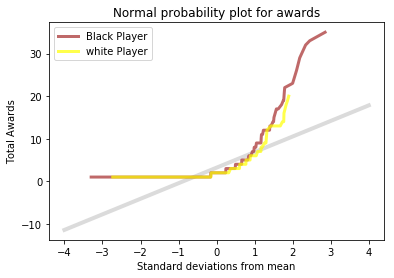

In [38]:
mean, var = thinkstats2.TrimmedMeanVar(white_df.award, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(black_df.award)
thinkplot.Plot(xs, ys, label='Black Player', color='brown')

xs, ys = thinkstats2.NormalProbability(white_df.award)
thinkplot.Plot(xs, ys, label='white Player', color='yellow')
thinkplot.Config(title='Normal probability plot for awards',
                 xlabel='Standard deviations from mean',
                 ylabel='Total Awards')

## Section 5-)

In [39]:
#In Cov function, we can calculate covariance values between two variables.
#It will calculate tendency of two variable.
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [40]:
white_cov = Cov(white_df.points, white_df.award)
print "Covariance value between points and awards for white people:", white_cov

Covariance value between points and awards for white people: 16220.1589462


In [41]:
black_cov = Cov(black_df.points, black_df.award)
print "Covariance value between points and awards for black people:", black_cov

Covariance value between points and awards for black people: 24963.1941667


In [42]:
#In Corr function, we can calculate correlation values between two variables.
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [43]:
white_corr = Corr(white_df.points, white_df.award)
print "Correlation between points and awards for white people:", white_corr

Correlation between points and awards for white people: 0.666696721028


In [44]:
black_corr = Corr(black_df.points, black_df.award)
print "Correlation between points and awards for black people:", black_corr

Correlation between points and awards for black people: 0.625987813598


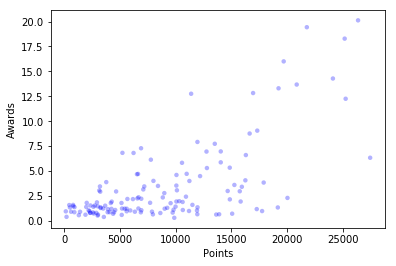

In [45]:
#This cell creating jitter plot for white people. It helps to compare relationship between points and awards.
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(white_df.points, 0.3)
weights = Jitter(white_df.award, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.3, s=20)
thinkplot.Config(xlabel='Points',
                 ylabel='Awards',                 
                 legend=False)

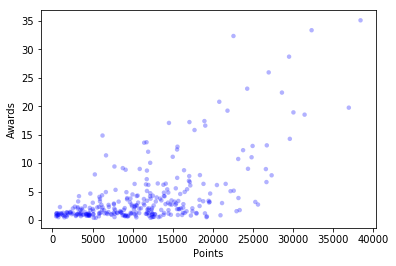

In [46]:
#This cell creating jitter plot for black people. It helps to compare relationship between points and awards.
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(black_df.points, 0.3)
weights = Jitter(black_df.award, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.3, s=20)
thinkplot.Config(xlabel='Points',
                 ylabel='Awards',                 
                 legend=False)

## Section 6-)

In [47]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
#In this class, we are creating test statistics for plotting.

#### After at this point, we will find p values between variables to analyze significance. Also, we are plotting for analyzing test statistics.

P-value: 0.0


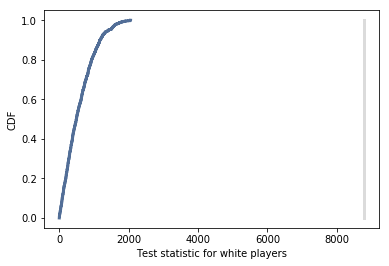

<Figure size 576x432 with 0 Axes>

In [48]:
white_data = white_df.points, white_df.award
ht = DiffMeansPermute(white_data)

pvalue = ht.PValue()
print "P-value:", pvalue

ht.PlotCdf()
thinkplot.Show(xlabel='Test statistic for white players', ylabel='CDF')

P-value: 0.0


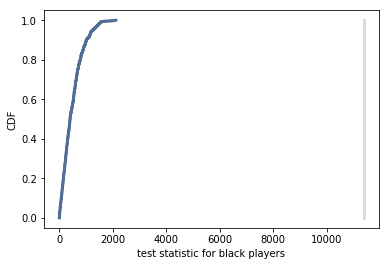

<Figure size 576x432 with 0 Axes>

In [49]:
black_data = black_df.points, black_df.award
ht = DiffMeansPermute(black_data)

pvalue = ht.PValue()
print "P-value:", pvalue

ht.PlotCdf()
thinkplot.Show(xlabel='test statistic for black players', ylabel='CDF')

P-value: 0.0


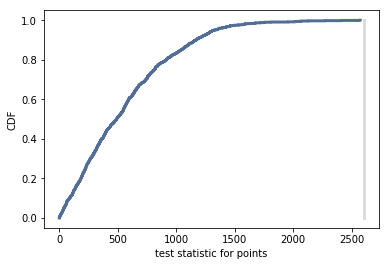

<Figure size 576x432 with 0 Axes>

In [50]:
points_data = black_df.points, white_df.points
ht = DiffMeansPermute(points_data)

pvalue = ht.PValue()
print "P-value:", pvalue

ht.PlotCdf()
thinkplot.Show(xlabel='test statistic for points', ylabel='CDF')

P-value: 0.104


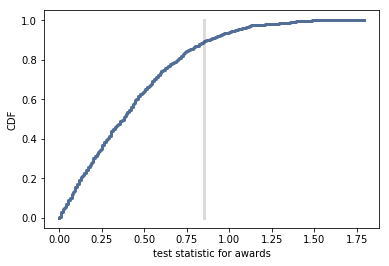

<Figure size 576x432 with 0 Axes>

In [51]:
awards_data = black_df.award, white_df.award
ht = DiffMeansPermute(awards_data)

pvalue = ht.PValue()
print "P-value:", pvalue

ht.PlotCdf()
thinkplot.Show(xlabel='test statistic for awards', ylabel='CDF')